Demonstrating MNIST dataset...


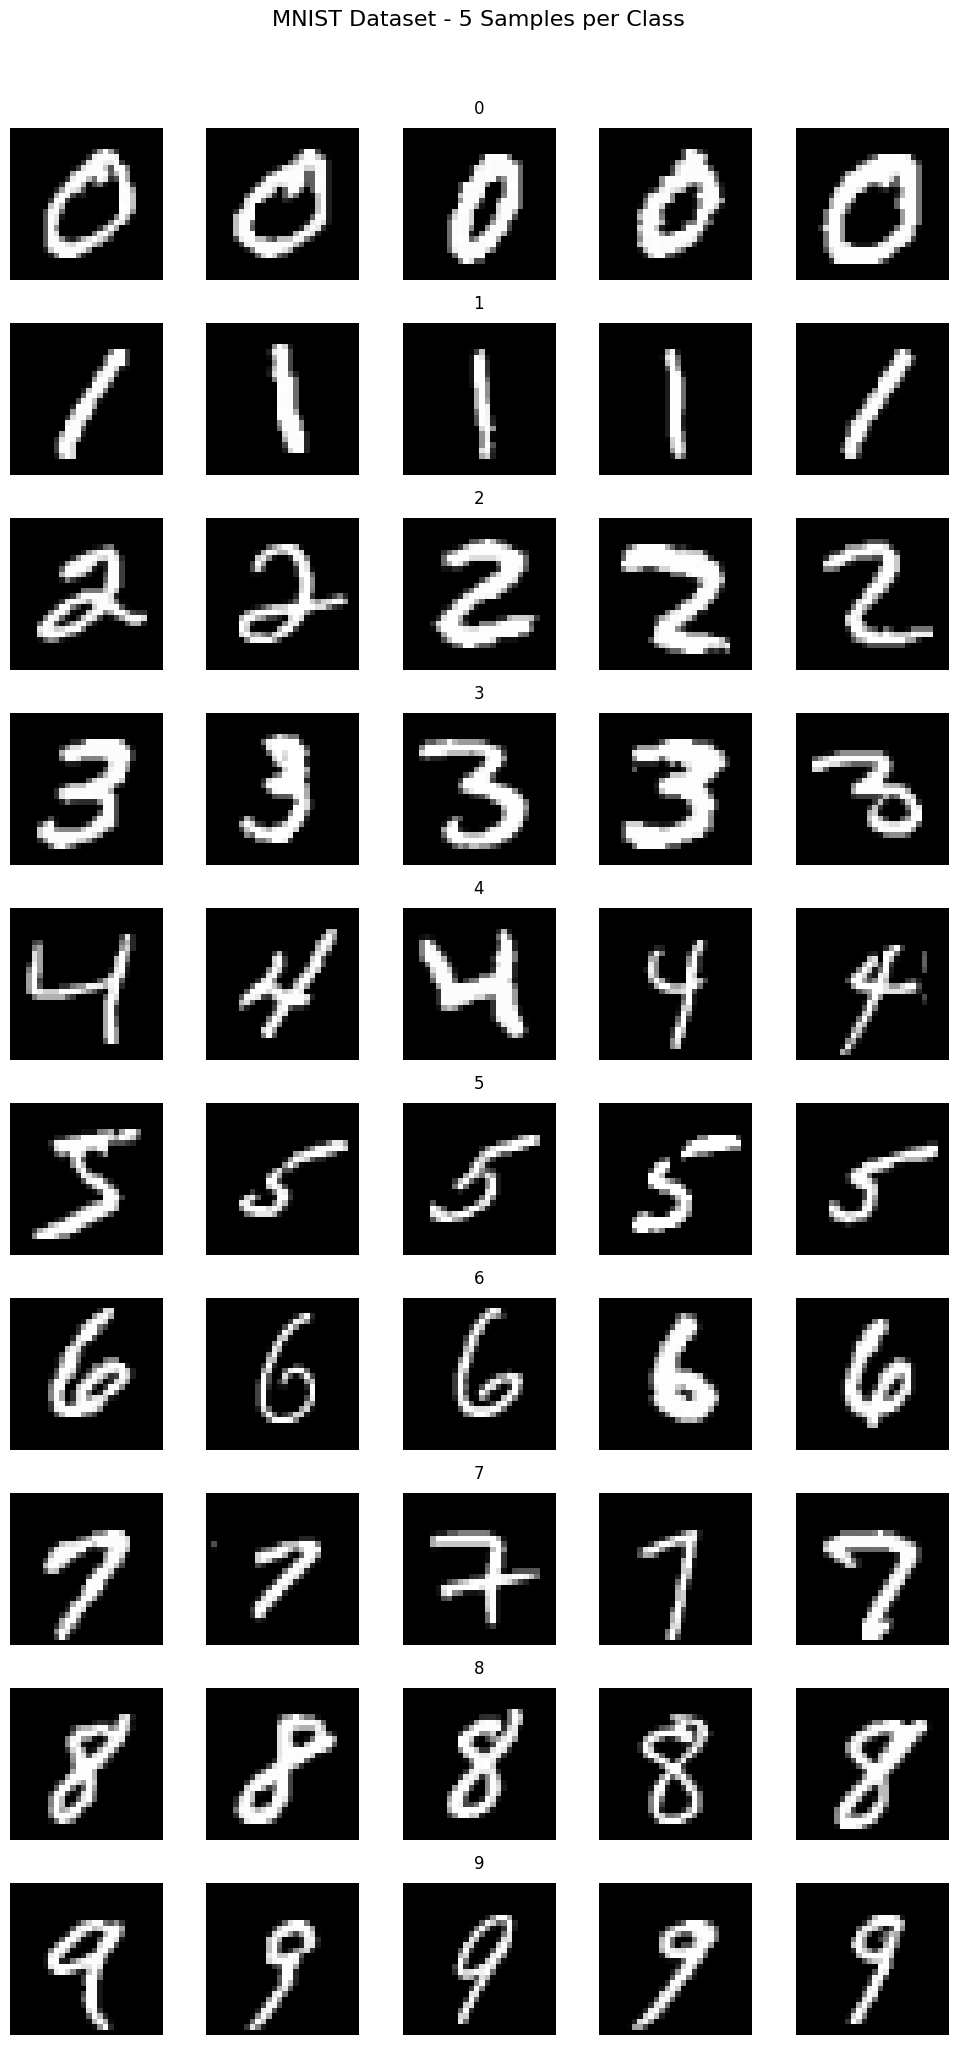


Demonstrating CIFAR-10 dataset...


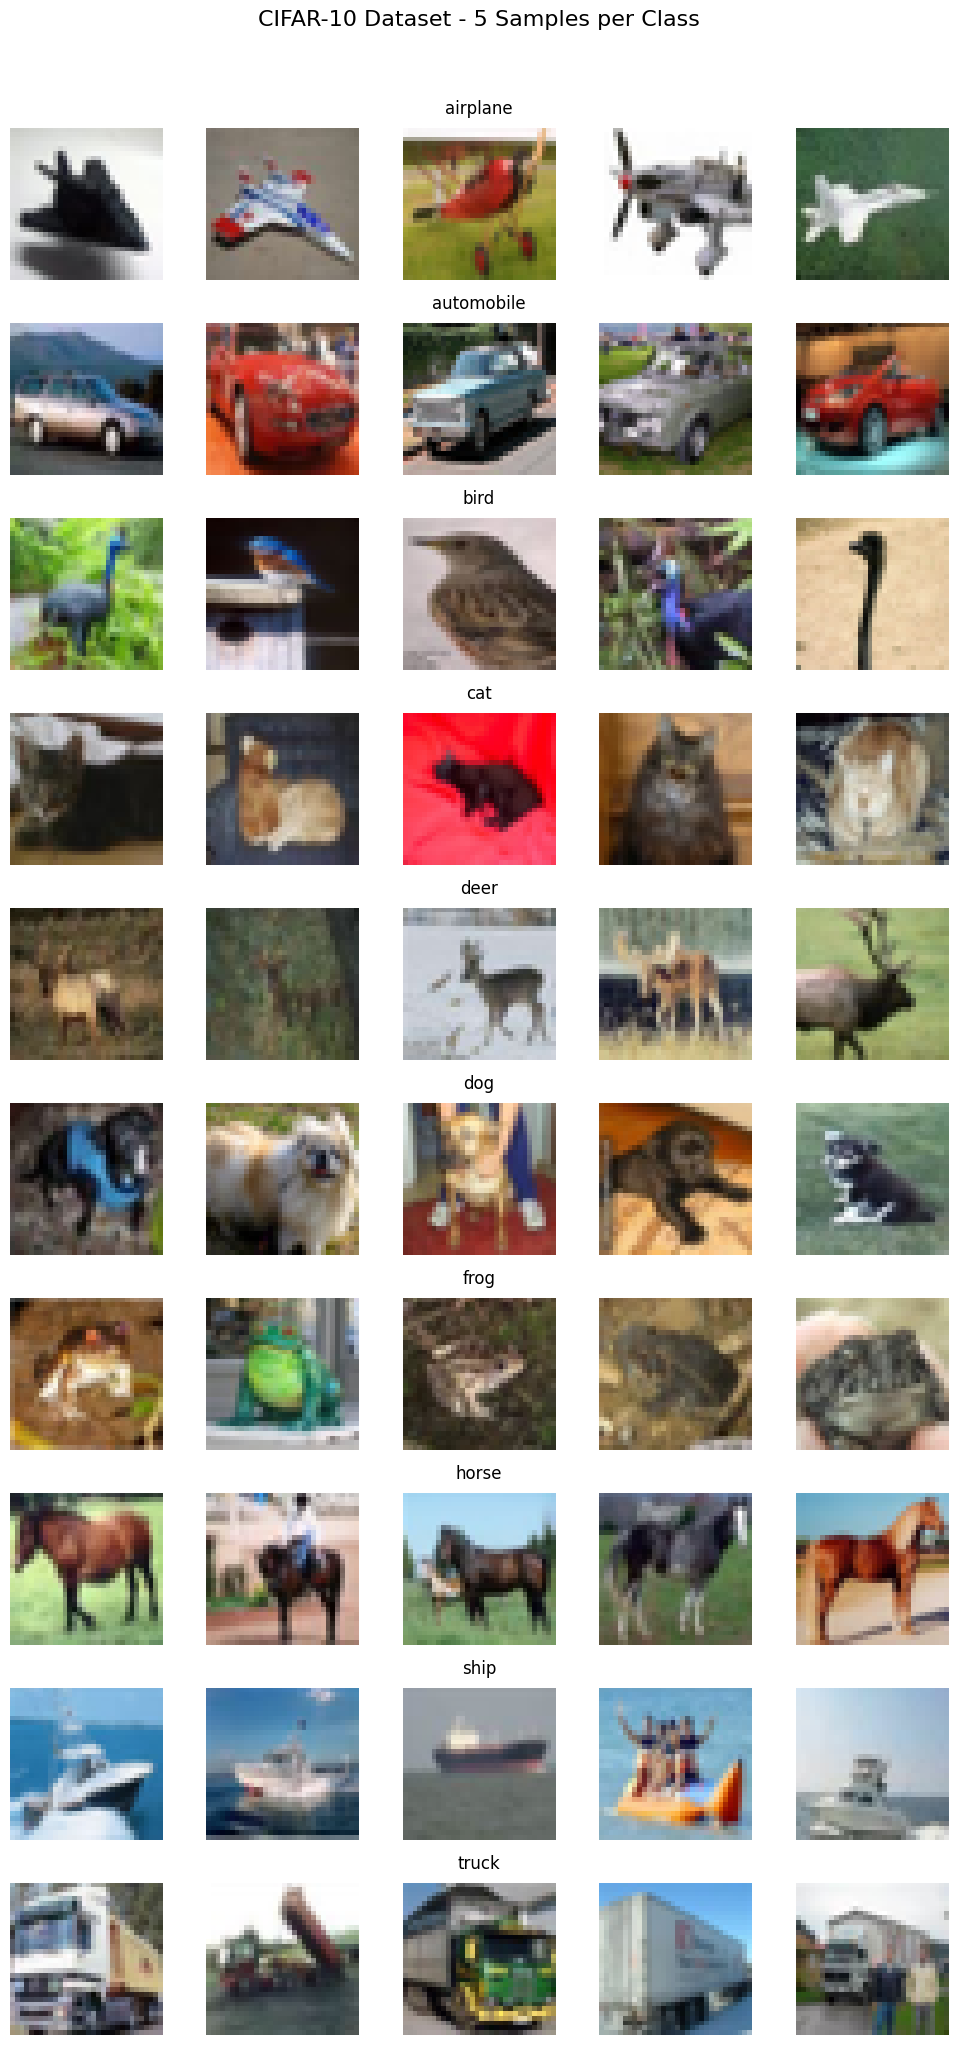

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10, mnist

def plot_samples_per_class(images, labels, class_names, title, samples_per_class=5):
    """Plot samples from each class with only the label above each image."""
    num_classes = len(class_names)

    plt.figure(figsize=(samples_per_class * 2, num_classes * 2))
    plt.suptitle(title, fontsize=16, y=1.02)

    for class_id, class_name in enumerate(class_names):
        # Get indices of samples for this class
        class_indices = np.where(labels == class_id)[0]
        selected_indices = class_indices[:samples_per_class]

        for i, idx in enumerate(selected_indices):
            plt.subplot(num_classes, samples_per_class,
                        class_id * samples_per_class + i + 1)
            plt.imshow(images[idx], cmap='gray' if len(images[idx].shape) == 2 else None)
            if i == samples_per_class // 2:  # Only show label in the middle
                plt.title(class_name, pad=10)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

def demonstrate_mnist():
    """Demonstrate the MNIST dataset."""
    # Load MNIST dataset
    (train_images, train_labels), (_, _) = mnist.load_data()

    # MNIST class names
    class_names = [str(i) for i in range(10)]

    # Plot samples
    plot_samples_per_class(train_images, train_labels, class_names,
                         "MNIST Dataset - 5 Samples per Class")

def demonstrate_cifar10():
    """Demonstrate the CIFAR-10 dataset."""
    # Load CIFAR-10 dataset
    (train_images, train_labels), (_, _) = cifar10.load_data()
    train_labels = train_labels.squeeze()  # Convert from (n, 1) to (n,)

    # CIFAR-10 class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # Plot samples
    plot_samples_per_class(train_images, train_labels, class_names,
                         "CIFAR-10 Dataset - 5 Samples per Class")

if __name__ == "__main__":
    print("Demonstrating MNIST dataset...")
    demonstrate_mnist()

    print("\nDemonstrating CIFAR-10 dataset...")
    demonstrate_cifar10()

1. Clean MNIST


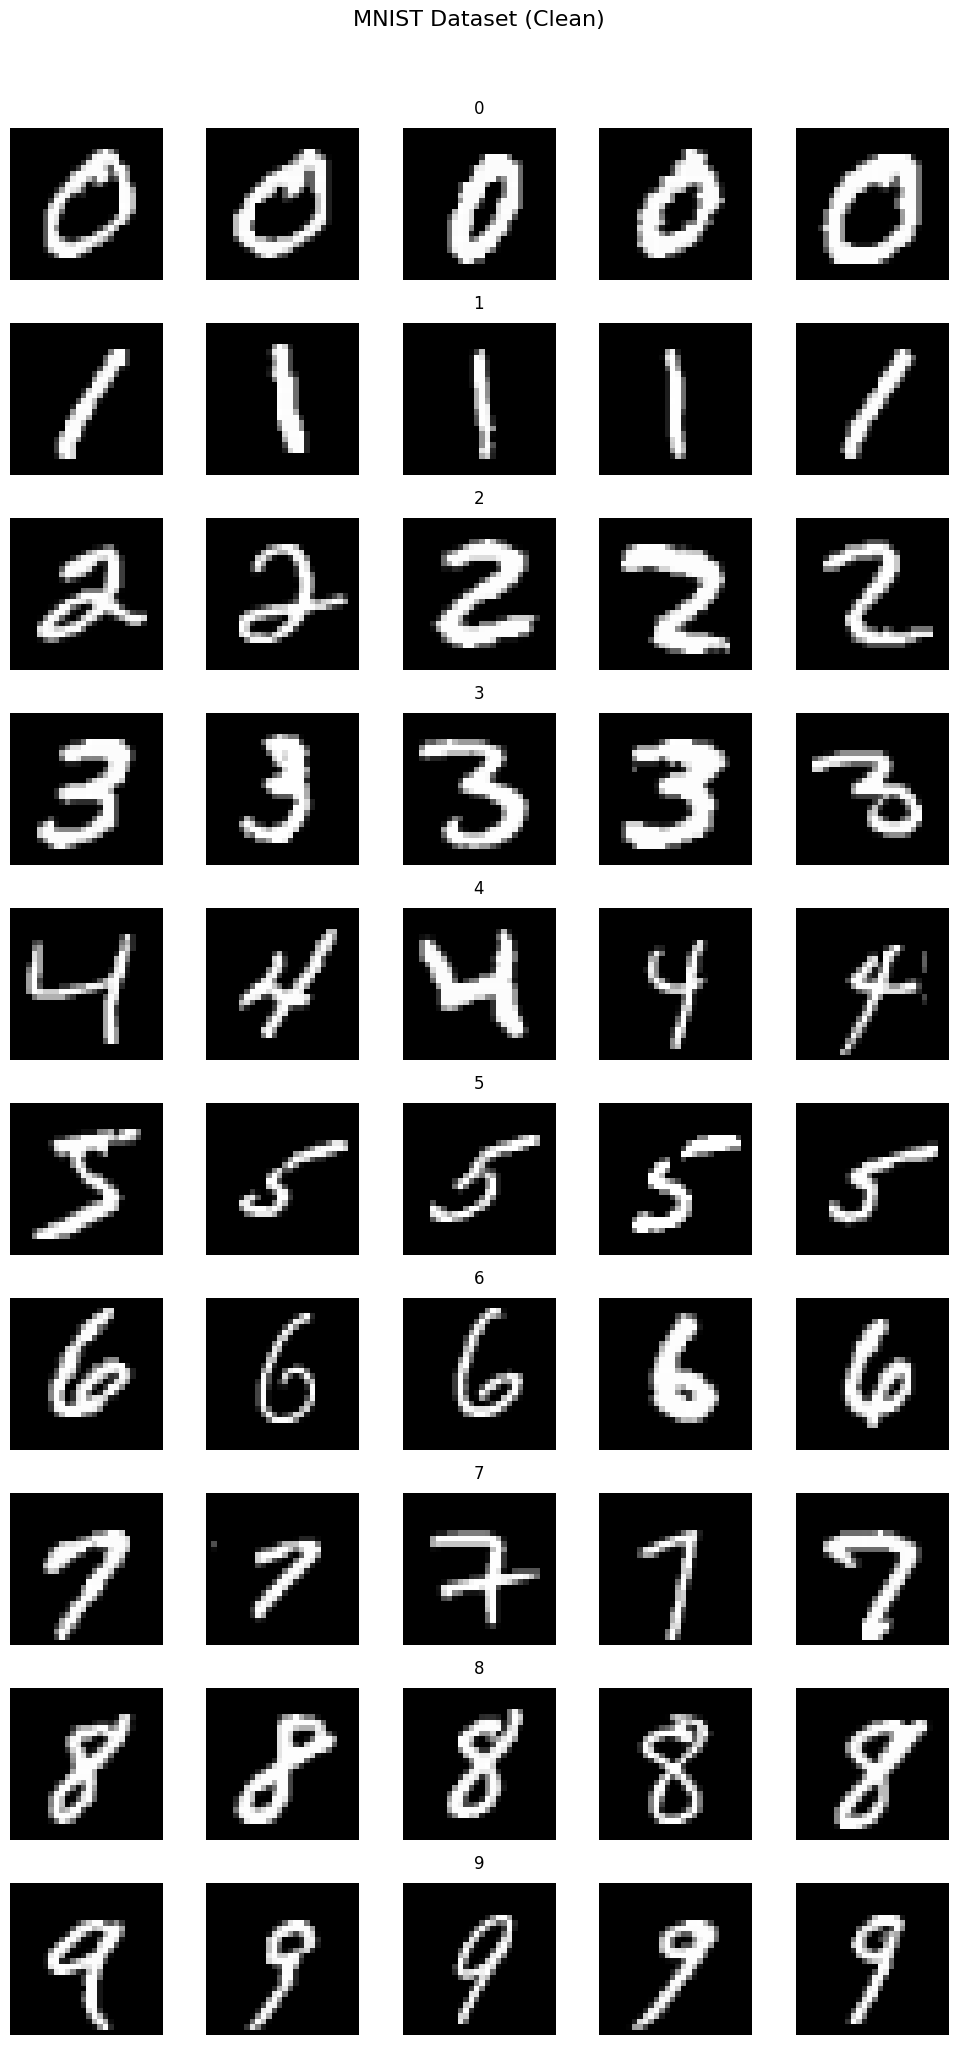


2. Noisy MNIST (σ=0.5)


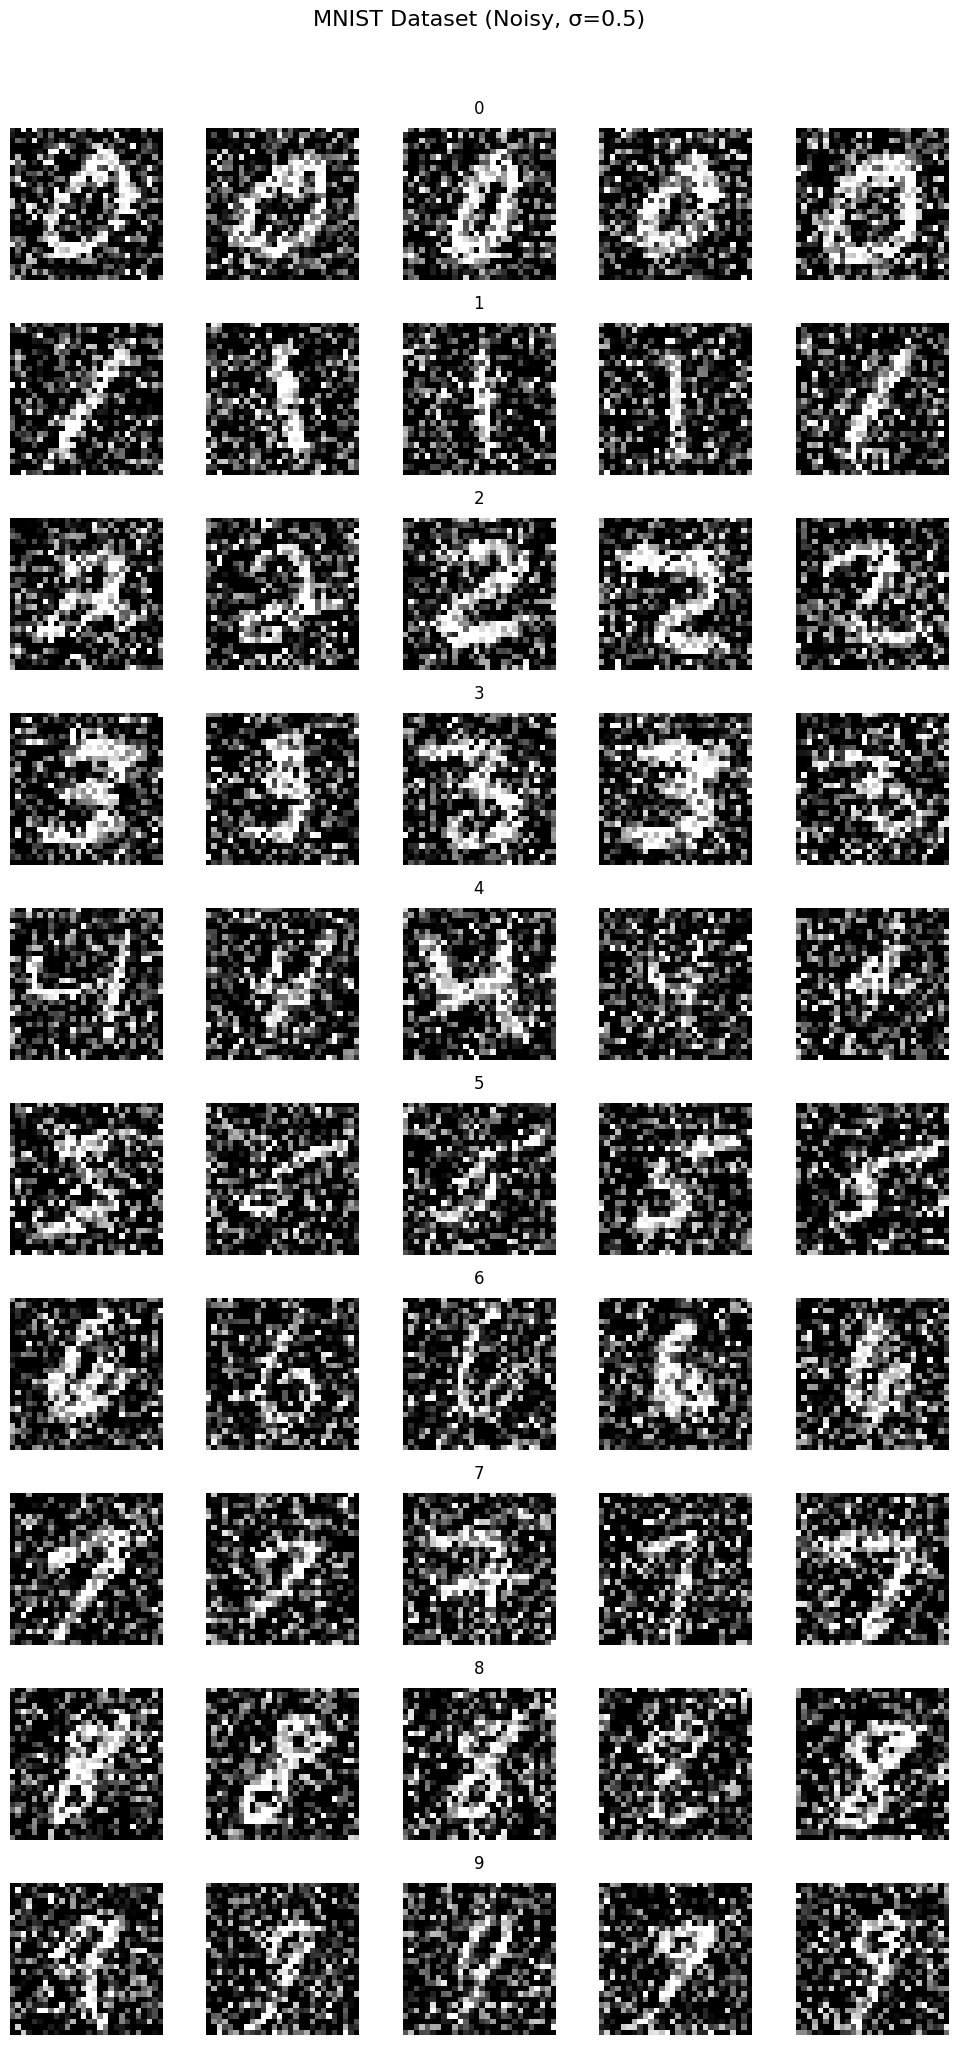


3. CIFAR-10


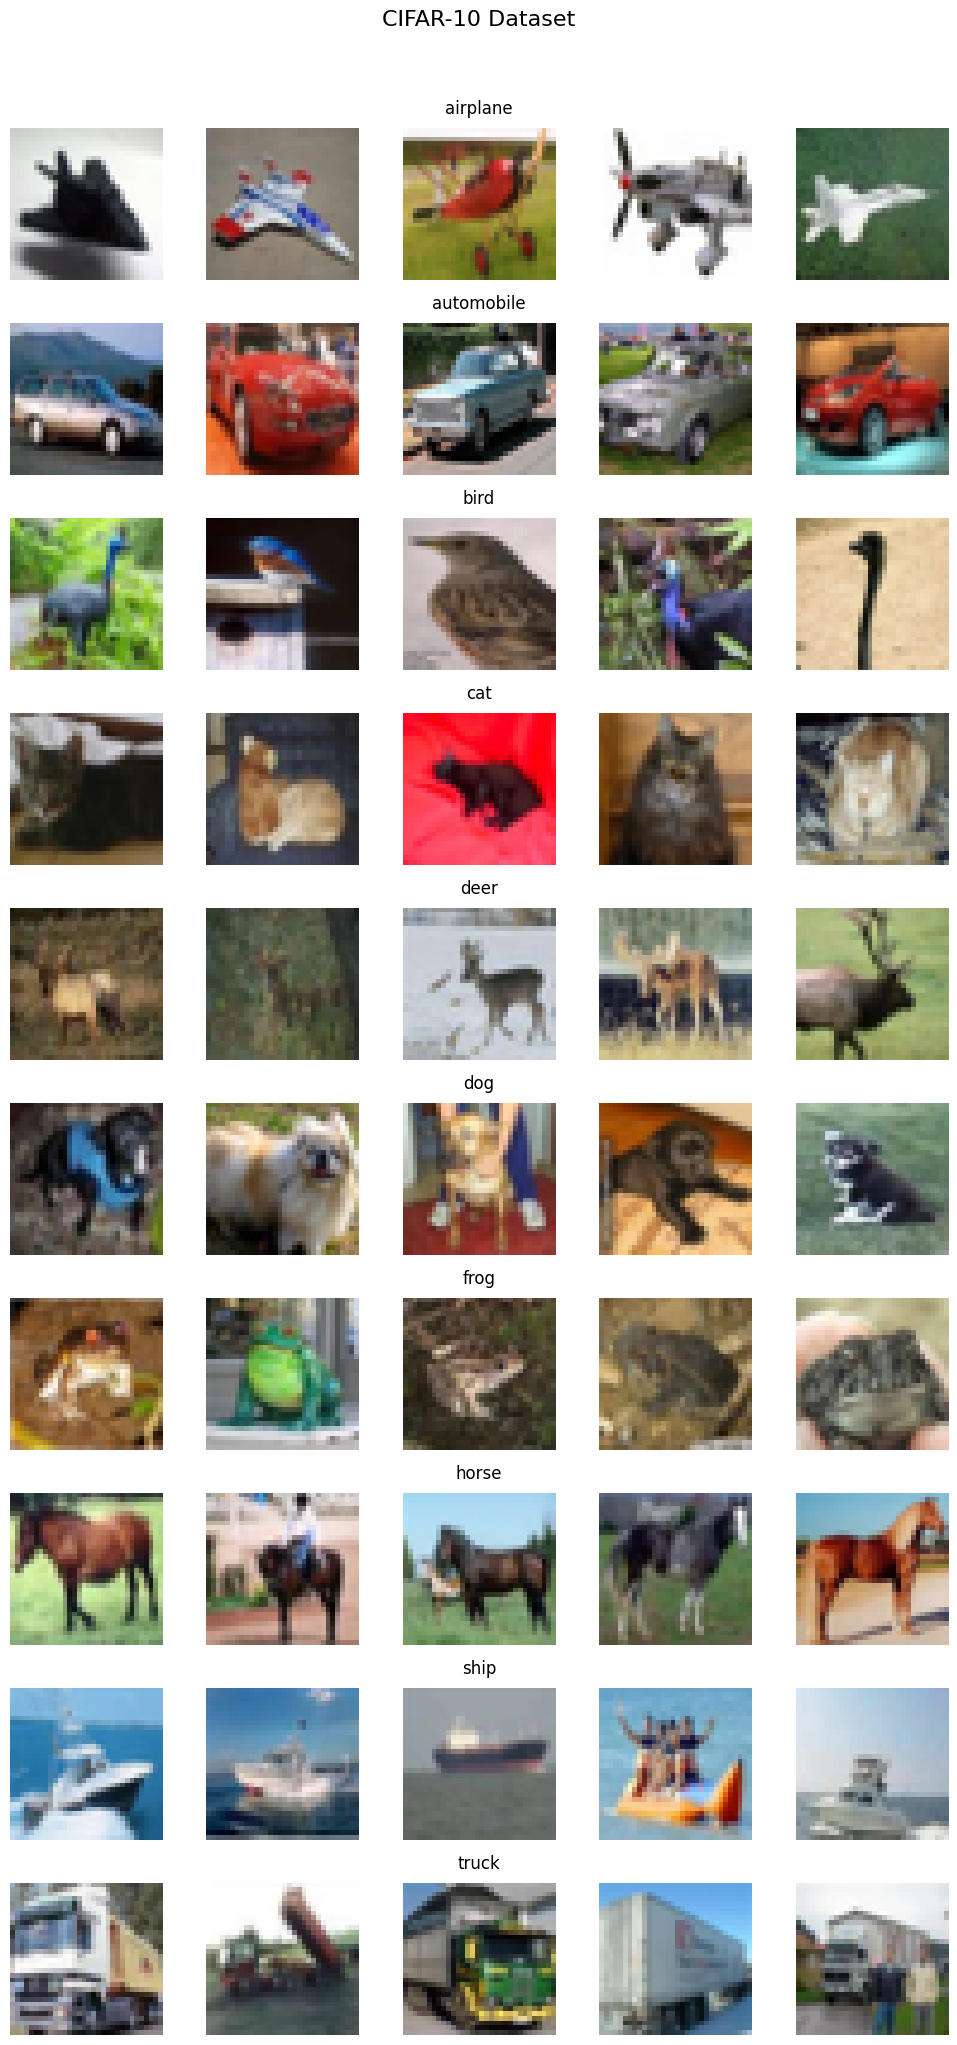

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10, mnist

def add_gaussian_noise(images, sigma=0.5):
    """Add Gaussian noise to images with standard deviation sigma"""
    noise = np.random.normal(0, sigma, images.shape) * 255  # Scale for [0,255] range
    noisy_images = images + noise
    return np.clip(noisy_images, 0, 255).astype(np.uint8)

def plot_samples(images, labels, class_names, title, ncols=5):
    """Plot samples from each class with class labels"""
    num_classes = len(class_names)
    plt.figure(figsize=(ncols * 2, num_classes * 2))
    plt.suptitle(title, fontsize=16, y=1.02)

    for class_id, class_name in enumerate(class_names):
        class_indices = np.where(labels == class_id)[0][:ncols]
        for i, idx in enumerate(class_indices):
            ax = plt.subplot(num_classes, ncols, class_id * ncols + i + 1)
            plt.imshow(images[idx], cmap='gray' if len(images[idx].shape) == 2 else None)
            if i == ncols//2:
                plt.title(class_name, pad=10)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

def demonstrate_mnist():
    """Demonstrate MNIST dataset"""
    (train_images, train_labels), _ = mnist.load_data()
    class_names = [str(i) for i in range(10)]
    plot_samples(train_images, train_labels, class_names, "MNIST Dataset (Clean)")

def demonstrate_noisy_mnist():
    """Demonstrate MNIST with Gaussian noise"""
    (train_images, train_labels), _ = mnist.load_data()
    noisy_images = add_gaussian_noise(train_images, sigma=0.5)
    class_names = [str(i) for i in range(10)]
    plot_samples(noisy_images, train_labels, class_names, "MNIST Dataset (Noisy, σ=0.5)")

def demonstrate_cifar10():
    """Demonstrate CIFAR-10 dataset"""
    (train_images, train_labels), _ = cifar10.load_data()
    train_labels = train_labels.squeeze()
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    plot_samples(train_images, train_labels, class_names, "CIFAR-10 Dataset")

if __name__ == "__main__":
    print("1. Clean MNIST")
    demonstrate_mnist()

    print("\n2. Noisy MNIST (σ=0.5)")
    demonstrate_noisy_mnist()

    print("\n3. CIFAR-10")
    demonstrate_cifar10()